In [25]:
import pm4py

log = pm4py.read_xes('../data/raw_datasets/Helpdesk.xes.gz')
log

parsing log, completed traces :: 100%|██████████| 4580/4580 [00:00<00:00, 4902.32it/s]


,concept:name,lifecycle:transition,org:resource,time:timestamp,Activity,Resource,case:concept:name,case:variant,case:variant-index,case:creator
0,Assign seriousness,complete,Value 2,2010-01-13 06:40:25+00:00,Assign seriousness,Value 2,Case3608,Variant 33,33,Fluxicon Disco
1,Take in charge ticket,complete,Value 2,2010-01-29 06:52:27+00:00,Take in charge ticket,Value 2,Case3608,Variant 33,33,Fluxicon Disco
2,Resolve ticket,complete,Value 2,2010-01-29 06:52:34+00:00,Resolve ticket,Value 2,Case3608,Variant 33,33,Fluxicon Disco
3,Closed,complete,Value 5,2010-02-13 06:52:48+00:00,Closed,Value 5,Case3608,Variant 33,33,Fluxicon Disco
4,Closed,complete,Value 5,2010-02-13 06:52:48+00:00,Closed,Value 5,Case3608,Variant 33,33,Fluxicon Disco
...,...,...,...,...,...,...,...,...,...,...
21343,Assign seriousness,complete,Value 18,2013-11-28 15:07:59+00:00,Assign seriousness,Value 18,Case1735,Variant 89,89,Fluxicon Disco
21344,Require upgrade,complete,Value 1,2013-12-16 14:08:53+00:00,Require upgrade,Value 1,Case1735,Variant 89,89,Fluxicon Disco
21345,Resolve ticket,complete,Value 2,2013-12-17 07:28:06+00:00,Resolve ticket,Value 2,Case1735,Variant 89,89,Fluxicon Disco
21346,Resolve ticket,complete,Value 2,2013-12-17 07:28:07+00:00,Resolve ticket,Value 2,Case1735,Variant 89,89,Fluxicon Disco


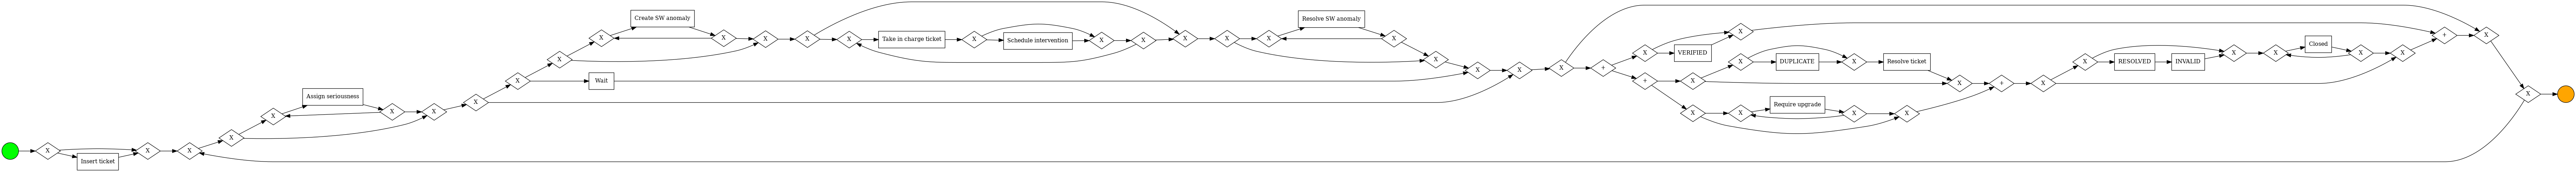

In [26]:
bpmn_graph = pm4py.discovery.discover_bpmn_inductive(log)
pm4py.view_bpmn(bpmn_graph)

In [27]:
log['concept:name_next'] = log['concept:name'].shift(-1)
log['time:timestamp_next'] = log['time:timestamp'].shift(-1)
log.loc[(log['concept:name'] == log['concept:name_next']) & (log['time:timestamp'] == log['time:timestamp_next'])]

,concept:name,lifecycle:transition,org:resource,time:timestamp,Activity,Resource,case:concept:name,case:variant,case:variant-index,case:creator,concept:name_next,time:timestamp_next
3,Closed,complete,Value 5,2010-02-13 06:52:48+00:00,Closed,Value 5,Case3608,Variant 33,33,Fluxicon Disco,Closed,2010-02-13 06:52:48+00:00
20,Closed,complete,Value 5,2010-02-13 11:10:27+00:00,Closed,Value 5,Case1534,Variant 33,33,Fluxicon Disco,Closed,2010-02-13 11:10:27+00:00
210,Closed,complete,Value 5,2010-03-31 04:51:20+00:00,Closed,Value 5,Case3238,Variant 53,53,Fluxicon Disco,Closed,2010-03-31 04:51:20+00:00
416,Resolve ticket,complete,Value 2,2010-04-16 12:56:30+00:00,Resolve ticket,Value 2,Case3004,Variant 30,30,Fluxicon Disco,Resolve ticket,2010-04-16 12:56:30+00:00
490,Closed,complete,Value 5,2010-05-08 04:27:30+00:00,Closed,Value 5,Case1789,Variant 148,148,Fluxicon Disco,Closed,2010-05-08 04:27:30+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
20150,Resolve ticket,complete,Value 2,2013-07-23 07:40:03+00:00,Resolve ticket,Value 2,Case2512,Variant 26,26,Fluxicon Disco,Resolve ticket,2013-07-23 07:40:03+00:00
20169,Wait,complete,Value 2,2013-07-16 13:10:51+00:00,Wait,Value 2,Case367,Variant 36,36,Fluxicon Disco,Wait,2013-07-16 13:10:51+00:00
20625,Resolve ticket,complete,Value 14,2013-09-26 05:48:37+00:00,Resolve ticket,Value 14,Case232,Variant 44,44,Fluxicon Disco,Resolve ticket,2013-09-26 05:48:37+00:00
20940,Wait,complete,Value 2,2013-10-23 05:21:51+00:00,Wait,Value 2,Case1079,Variant 14,14,Fluxicon Disco,Wait,2013-10-23 05:21:51+00:00
